import necesssary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


read the data

In [2]:
df = pd.read_csv("imdb_top_1000.csv")
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


data inspection: check dimension, data types etc

In [3]:
df.shape


(1000, 16)

In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [11]:
df.duplicated().sum()


np.int64(0)

check for missing values

In [5]:
df.isnull().sum()


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

drop unnecessary column

In [6]:
df = df.drop(columns=['Poster_Link', 'Overview'])


Data type casting

In [7]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')


In [8]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')


In [9]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


treat missing values, fill with appropirate statistical imputation(mean, median or mode)

In [10]:
df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)
df['Gross'].fillna(df['Gross'].median(), inplace=True)
df['Certificate'].fillna('Not Rated', inplace=True)


C:\Users\MrThiccBeans\AppData\Local\Temp\ipykernel_28116\2883443633.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)
C:\Users\MrThiccBeans\AppData\Local\Temp\ipykernel_28116\2883443633.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

check if the above operations worked

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  999 non-null    float64
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          1000 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


save the preprocessed data to a new csv file

In [13]:
df.to_csv("imdb_top_1000_preprocessed.csv", index=False)


EDA START

In [14]:
df.describe()


,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.217217,122.891000,7.949300,78.133000,2.736929e+05,6.051360e+07
std,23.297025,28.093671,0.275491,11.368225,3.273727e+05,1.014192e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.552625e+04,5.012919e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,85.250000,3.741612e+05,6.153989e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


DATA VISUALIZATIONS

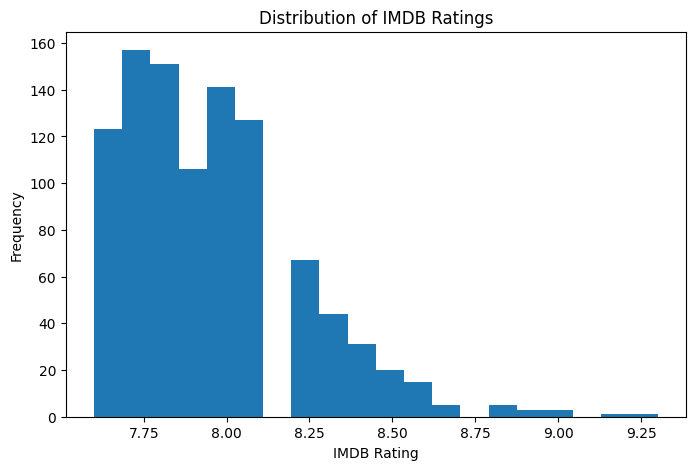

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df['IMDB_Rating'], bins=20)
plt.xlabel("IMDB Rating")
plt.ylabel("Frequency")
plt.title("Distribution of IMDB Ratings")
plt.show()


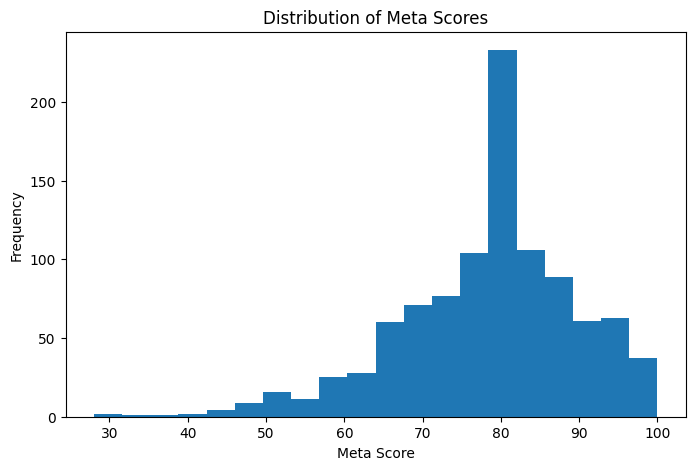

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['Meta_score'], bins=20)
plt.xlabel("Meta Score")
plt.ylabel("Frequency")
plt.title("Distribution of Meta Scores")
plt.show()


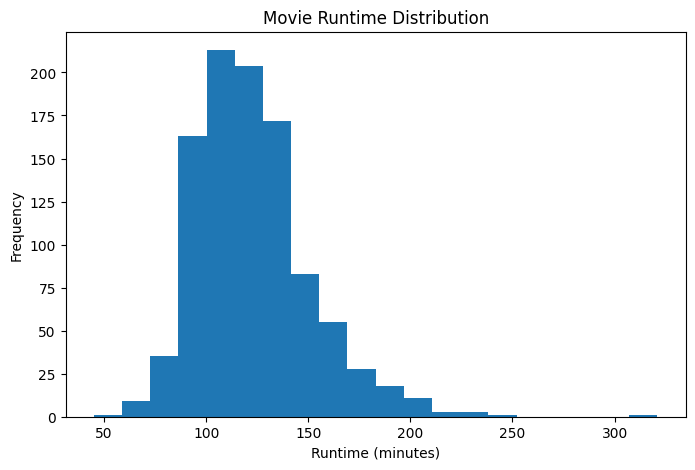

In [17]:
plt.figure(figsize=(8,5))
plt.hist(df['Runtime'], bins=20)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.title("Movie Runtime Distribution")
plt.show()


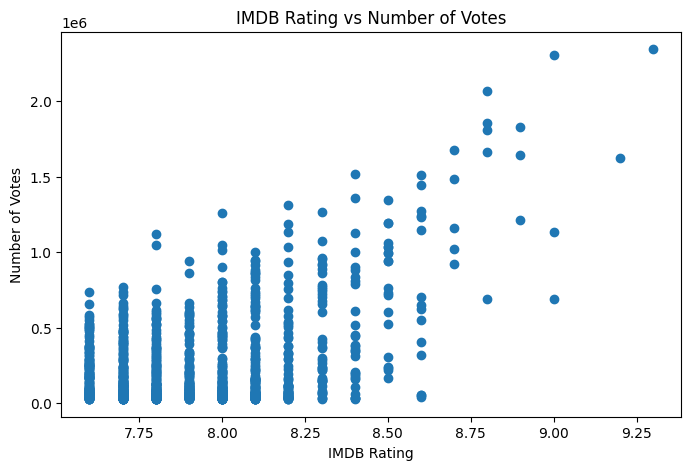

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(df['IMDB_Rating'], df['No_of_Votes'])
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Votes")
plt.title("IMDB Rating vs Number of Votes")
plt.show()


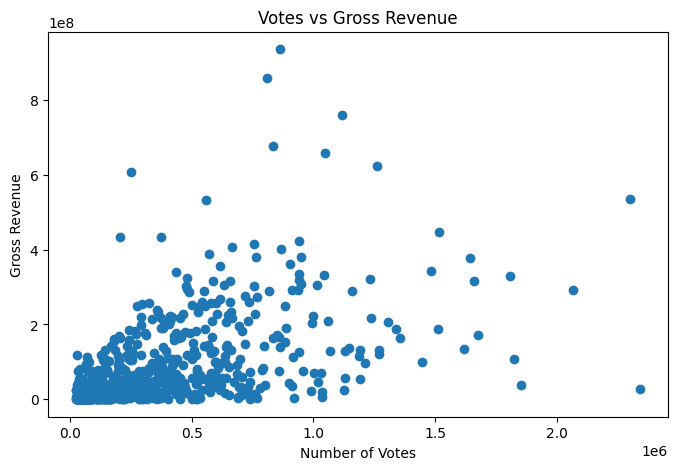

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(df['No_of_Votes'], df['Gross'])
plt.xlabel("Number of Votes")
plt.ylabel("Gross Revenue")
plt.title("Votes vs Gross Revenue")
plt.show()


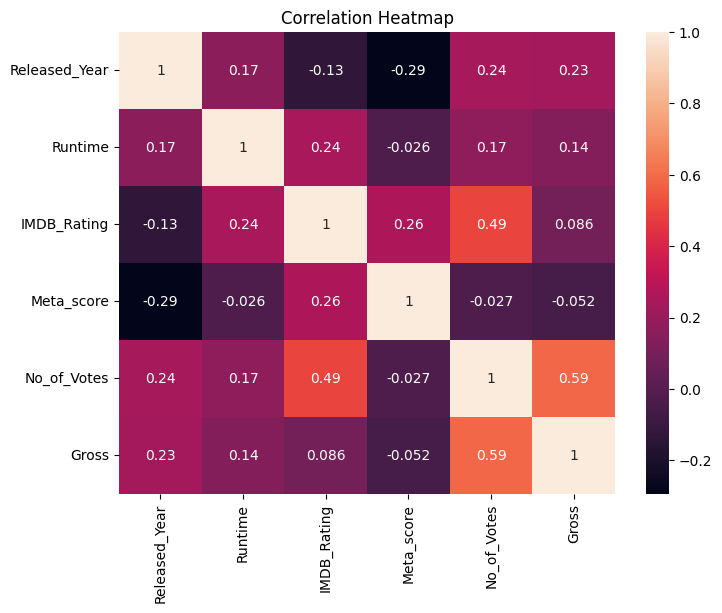

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()


AVERAGE RATING BY CERTIFICATE

In [21]:
df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False)


Certificate
TV-14        8.300000
16           8.100000
TV-MA        8.100000
Unrated      8.100000
Passed       8.020588
G            8.000000
A            7.998985
U            7.976923
UA           7.957143
Approved     7.945455
Not Rated    7.931683
PG           7.927027
TV-PG        7.900000
R            7.869863
GP           7.850000
PG-13        7.797674
U/A          7.600000
Name: IMDB_Rating, dtype: float64

TOP 10 GENERES

In [22]:
df['Genre'].value_counts().head(10)


Genre
Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: count, dtype: int64

top 10 directors by average rating

In [23]:
df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)


Director
Frank Darabont        8.95
Lana Wachowski        8.70
Irvin Kershner        8.70
Masaki Kobayashi      8.60
Fernando Meirelles    8.60
George Lucas          8.60
Sudha Kongara         8.60
Thomas Kail           8.60
Roberto Benigni       8.60
Milos Forman          8.50
Name: IMDB_Rating, dtype: float64